## TRAINING AN OBJECT DETECTION MODEL FOR CUSTOM DATASET(APİCAL LESİON DATASET)


*  I will use tensorflow object detection api
*  https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/index.html





## installing tensorflow

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 18 kB/s 
     |████████████████████████████████| 1.7 MB 53.5 MB/s 
     |████████████████████████████████| 5.9 MB 46.3 MB/s 
     |████████████████████████████████| 438 kB 65.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


## Cloning TFOD 2.0 Github

In [3]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 77997, done.
remote: Counting objects: 100% (405/405), done.
remote: Compressing objects: 100% (212/212), done.
remote: Total 77997 (delta 245), reused 322 (delta 191), pack-reused 77592
Receiving objects: 100% (77997/77997), 593.54 MiB | 16.84 MiB/s, done.
Resolving deltas: 100% (55399/55399), done.


In [4]:
cd /content/models/research

/content/models/research


## The Tensorflow Object Detection API uses Protobufs to configure model and training parameters. Before the framework can be used, the Protobuf libraries must be downloaded and compiled.

In [5]:
!protoc object_detection/protos/*.proto --python_out=.

## COCO API installation

In [6]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 16.18 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [7]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [8]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7

In [9]:
cp -r pycocotools /content/models/research

# **Install the Object Detection API**
Installation of the Object Detection API is achieved by installing the object_detection package. This is done by running the following commands from within /content/models/research:

In [10]:
pwd

'/content/models/research/cocoapi/PythonAPI'

In [11]:
cd ..

/content/models/research/cocoapi


In [12]:
cd ..

/content/models/research


In [13]:
cp object_detection/packages/tf2/setup.py .

In [14]:
!python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.9 MB 58.3 MB/s 
     |████████████████████████████████| 352 kB 70.9 MB/s 
     |████████████████████████████████| 2.2 MB 56.4 MB/s 
     |████████████████████████████████| 25.0 MB 1.4 MB/s 
     |████████████████████████████████| 67 kB 6.8 MB/s 
     |████████████████████████████████| 116 kB 72.3 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 636 kB 67.8 MB/s 
     |██

## **Test your Installation**
To test the installation, run the following command from within /content/models/research:

In [15]:
!python object_detection/builders/model_builder_tf2_test.py

2022-10-17 09:32:49.358847: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-17 09:32:50.854676: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-17 09:32:50.854946: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-17 09:32:50.854978: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

# Create a folder named training_demo in your google drive.
* upload the generate_tfrecord.py file to the training_demo folder(The files are available at https://github.com/BattalBAKINDI/apical-lesion-detection.git).
* Create another folder named annotations inside the training_demo    folder.
 upload the label_map.pbtxt(The files are available at https://github.com/BattalBAKINDI/apical-lesion-detection.git). file to the annotations folder.
* Create another folder named exported_models inside the training_demo folder.
* Create another folder named models inside the training_demo folder.
* Create another folder named pre-trained-models inside the training_demo folder.
* Create another folder named images inside the training_demo folder.
Create another folder named train inside the images folder.
Create another folder named test inside the images folder.
label data using labelimg (https://www.dropbox.com/s/tq7zfrcwl44vxan/windows_v1.6.0.zip?dl=1).
 load the label data into train and test folders





## **Create TensorFlow Records**
Now that we have generated our annotations and split our dataset into the desired training and testing subsets, it is time to convert our annotations into the so called TFRecord format.

In [16]:
pwd

'/content/models/research'

In [17]:
cd /content/drive/MyDrive/training_demo

/content/drive/MyDrive/training_demo


In [18]:
ls

annotations/      exporter_main_v2.py   images/            models/
exported-models/  generate_tfrecord.py  model_main_tf2.py  pre-trained-models/


In [19]:
# Create train data:
!python generate_tfrecord.py -x /content/drive/MyDrive/training_demo/images/train -l /content/drive/MyDrive/training_demo/annotations/label_map.pbtxt -o /content/drive/MyDrive/training_demo/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/drive/MyDrive/training_demo/images/test -l /content/drive/MyDrive/training_demo/annotations/label_map.pbtxt -o /content/drive/MyDrive/training_demo/annotations/test.record

# For example
# python generate_tfrecord.py -x C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/images/train -l C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/label_map.pbtxt -o C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/train.record
# python generate_tfrecord.py -x C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/images/test -l C:/Users/sglvladi/Documents/Tensorflow2/workspace/training_demo/annotations/label_map.pbtxt -o C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/test.record

2022-10-17 10:09:29.300859: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: /content/drive/MyDrive/training_demo/annotations/train.record
2022-10-17 10:09:37.221772: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: /content/drive/MyDrive/training_demo/annotations/test.record


Once the above is done, there should be 2 new files under the training_demo/annotations folder, named test.record and train.record, respectively.

# **Configuring a Training Job**
For the purposes of this tutorial we will not be creating a training job from scratch, but rather we will reuse one of the pre-trained models provided by TensorFlow.

To begin with, we need to download the latest pre-trained network for the model we wish to use. This can be done by simply clicking on the name of the desired model in the table found in TensorFlow 2 Detection Model Zoo. Clicking on the name of your model should initiate a download for a *.tar.gz file.

Once the *.tar.gz file has been downloaded, open it using a decompression program of your choice (e.g. 7zip, WinZIP, etc.). Next, open the *.tar folder that you see when the compressed folder is opened, and extract its contents inside the folder /training_demo/pre-trained-models.

In [20]:
cd /content/drive/MyDrive/training_demo/pre-trained-models

/content/drive/MyDrive/training_demo/pre-trained-models


In [21]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz

--2022-10-17 10:10:21--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.4.128, 2404:6800:4003:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.4.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353643040 (337M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz.2’

faster_rcnn_resnet1 100%[===================>] 337.26M  76.3MB/s    in 4.4s    

2022-10-17 10:10:26 (77.2 MB/s) - ‘faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz.2’ saved [353643040/353643040]



In [22]:
!tar -xvf faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz

faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/checkpoint
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/pipeline.config
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/saved_model.pb
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/variables.index


# **Configure the Training Pipeline**
Now that we have downloaded and extracted our pre-trained model, let’s create a directory for our training job. Under the training_demo/models create a new directory named my_faster_rcnn_resnet101_v1_fpn and copy the /content/drive/MyDrive/training_demo/pre-trained-models/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/pipeline.config file inside the newly created directory.

Now, let’s have a look at the changes that we shall need to apply to the pipeline.config file :

You need to make the following changes:

* change num_classes to number of your classes.
* change test.record path, train.record path & labelmap path to the paths where you have created these files (paths should be relative to your current working directory while training).
* change fine_tune_checkpoint_type with value classification or detection depending on the type..
* change batch_size to any multiple of 8 depending upon the capability of your GPU. (eg:- 24,128,...,512).
* change num_steps to number of steps you want the detector to train.
* An example of what has been done can be seen in the pipeline.config file at https://github.com/Apikal-lesion-detection.github.


# **Training the Model**
Before we begin training our model, let's go and copy the /content/models/research/object_detection/model_main_tf2.py script and paste it straight into our training_demo folder. We will need this script in order to train our model.

In [23]:
pwd

'/content/drive/MyDrive/training_demo/pre-trained-models'

In [24]:
cd /content/drive/MyDrive/training_demo

/content/drive/MyDrive/training_demo


In [25]:
ls

annotations/      exporter_main_v2.py   images/            models/
exported-models/  generate_tfrecord.py  model_main_tf2.py  pre-trained-models/


In [26]:
!python model_main_tf2.py --model_dir=/content/drive/MyDrive/training_demo/models/my_faster_rcnn_resnet101_v1_fpn --pipeline_config_path=/content/drive/MyDrive/training_demo/models/my_faster_rcnn_resnet101_v1_fpn/pipeline.config

2022-10-17 10:27:38.158384: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-17 10:27:38.940919: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-17 10:27:38.941051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-17 10:27:38.941070: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

# **Exporting a Trained Model**
Once your training job is complete, you need to extract the newly trained inference graph, which will be later used to perform the object detection. This can be done as follows:

Copy the /content/models/research/object_detection/exporter_main_v2.py script and paste it straight into your training_demo folder.

After the process has completed, you should find a new folder my_model under the /training_demo/exported-models.

In [27]:
pwd

'/content/drive/MyDrive/training_demo'

In [28]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/training_demo/models/my_faster_rcnn_resnet101_v1_fpn/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/training_demo/models/my_faster_rcnn_resnet101_v1_fpn --output_directory /content/drive/MyDrive/training_demo/exported-models/my_model

2022-10-17 11:01:16.877945: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-17 11:01:17.886724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-17 11:01:17.886919: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-17 11:01:17.886939: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

# **Evaluating the Model**

Loading model...Done!


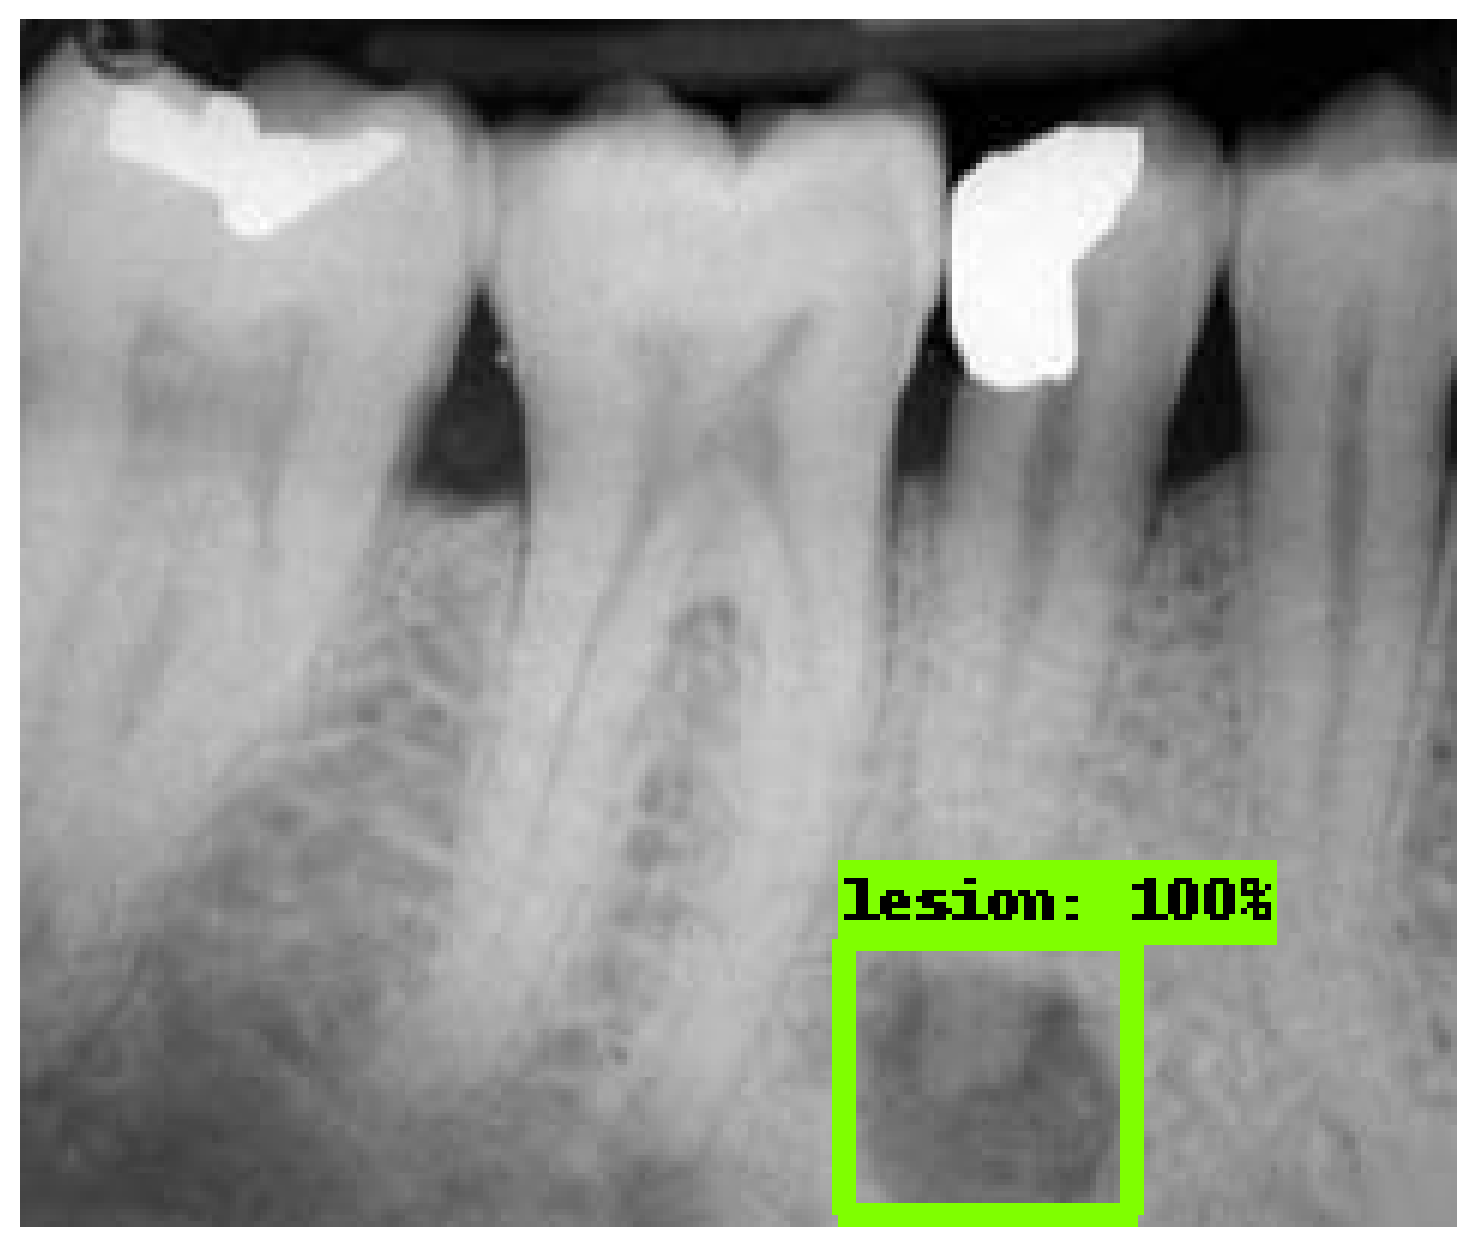

In [29]:
#Loading the saved_model
import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from google.colab.patches import cv2_imshow
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

IMAGE_SIZE = (12, 8) # Output display size as you want
import matplotlib.pyplot as plt
PATH_TO_SAVED_MODEL="/content/drive/MyDrive/training_demo/exported-models/my_model/saved_model"
print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap("/content/drive/MyDrive/training_demo/annotations/label_map.pbtxt",use_display_name=True)
#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

image_path = "/content/drive/MyDrive/mask_test_images/images (98).jpg"
#print('Running inference for {}... '.format(image_path), end='')

image_np = load_image_into_numpy_array(image_path)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.4, # Adjust this value to set the minimum probability boxes to be classified as True
      agnostic_mode=False)
%matplotlib inline
plt.figure(figsize=IMAGE_SIZE, dpi=200)
plt.axis("off")
plt.imshow(image_np_with_detections)
plt.show()